In [339]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

In [340]:
df= pd.read_csv("VNM.csv")

In [341]:
df

,Date,Close,Open,High,Low,Volume,Change %
0,12/1/2017,159039,151736,159039,151736,1.50M,4.98%
1,12/4/2017,164719,159039,166423,159039,1.70M,3.57%
2,12/5/2017,161473,164719,166342,160662,852.08K,-1.97%
3,12/6/2017,158227,158227,159850,151898,1.14M,-2.01%
4,12/7/2017,150924,158227,160580,150924,1.43M,-4.62%
...,...,...,...,...,...,...,...
1369,6/1/2023,66100,66100,66500,66000,1.21M,0.00%
1370,6/2/2023,65900,66200,66300,65500,2.97M,-0.30%
1371,6/5/2023,66500,66500,67200,66200,3.32M,0.91%
1372,6/6/2023,66400,66900,66900,66000,3.42M,-0.15%


In [342]:
#gắng index với giá Close
df1=df.reset_index()['Close']

In [343]:
df1

0       159039
1       164719
2       161473
3       158227
4       150924
         ...  
1369     66100
1370     65900
1371     66500
1372     66400
1373     66200
Name: Close, Length: 1374, dtype: int64

In [344]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [345]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [346]:
train_data.shape

(961, 1)

In [347]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [348]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [349]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [350]:
X_train.shape

(860, 100, 1)

In [351]:
X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = numpy.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [352]:
# Thay đổi kích thước của dữ liệu huấn luyện
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])

# Thay đổi kích thước của dữ liệu kiểm tra
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])


In [353]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)


In [354]:
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [355]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (860, 1)
Test data prediction: (173, 1)


In [356]:
#predict value against test
y_pred=neighbor.predict(X_test)

In [357]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(ytest, y_pred)

print("MAPE:", mape)


MAPE: 5312841050035.796


In [358]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 0.12487140711158325


In [359]:
#evaluate model's performance on train data
predict = neighbor.predict(X_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.8853065110634004
Mean Squared Error: 0.0021867033579666207
Root Mean Squared Error: 0.04676220009758545
Mean Absolute Error: 0.03464763479026478


In [360]:
#evaluate model's performance on test data
from sklearn.metrics import mean_absolute_percentage_error

r2 = r2_score(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
mae = mean_absolute_error(ytest, y_pred)
mape = mean_absolute_percentage_error(ytest, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("MAPE:", mape)


R2 Score: -13.325052517559175
Mean Squared Error: 0.015592868314026762
Root Mean Squared Error: 0.12487140711158325
Mean Absolute Error: 0.12079591337701434


In [361]:
def predict_30_days_knn(model, data, time_step):
    x_input = data[-time_step:].reshape(1, -1)  # Lấy dữ liệu cuối cùng để dự đoán
    temp_input = list(x_input)
    lst_output = []

    for i in range(30):
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, -1)
            yhat = model.predict(x_input)
            temp_input.extend(yhat.tolist())
            temp_input = temp_input[1:]
            lst_output.append(yhat[0])
        else:
            x_input = x_input.reshape(1, -1)
            yhat = model.predict(x_input)
            temp_input.extend(yhat.tolist())
            lst_output.append(yhat[0])

    return lst_output

# Dự đoán 30 ngày tiếp theo cho dữ liệu test_data với mô hình KNN
prediction_knn = predict_30_days_knn(neighbor, test_data, time_step)
print("Giá dự đoán 30 ngày sau:", prediction_knn)


Giá dự đoán 30 ngày sau: [0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923, 0.21668731083468923]


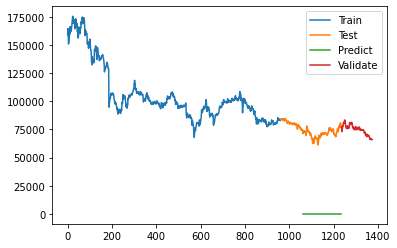

In [362]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()